In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/micro-club-pinktober-brain-tumor-classification/sample_submission.csv
/kaggle/input/micro-club-pinktober-brain-tumor-classification/train.csv
/kaggle/input/micro-club-pinktober-brain-tumor-classification/test.csv


# Importing necessary libraries and datasets

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
df = pd.read_csv("/kaggle/input/micro-club-pinktober-brain-tumor-classification/train.csv")
df

,tumor_type,size,location,edema,necrosis,enhancement,shape,margins,calcification,cystic_components,hemorrhage,ki67_index,mitotic_count,age,gender,symptoms_duration,neurological_deficit,kps_score,cancer_stage,id
0,pituitary,khlat_3lik,frontal,1,0,none,irregular,poorly_defined,1,0,0,100.0,19,65,female,233,0,90,IV,0
1,glioma,normal_brk,frontal,0,0,none,irregular,well_defined,0,1,0,40.0,13,84,amira,233,1,60,IV,1
2,metastatic,normal_brk,occipital,1,0,mild,irregular,well_defined,1,0,0,95.0,2,79,wa7ch,19,1,60,IV,2
3,meningioma,normal_brk,frontal,1,1,none,irregular,poorly_defined,1,0,0,100.0,13,71,wa7ch,157,0,80,IV,3
4,meningioma,normal_brk,brainstem,0,1,ring,irregular,well_defined,0,0,0,25.0,18,31,amira,207,1,90,IV,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,meningioma,normal_brk,cerebellum,0,1,none,regular,poorly_defined,0,0,0,35.0,8,47,amira,186,1,60,III,6995
6996,meningioma,khlat_3lik,cerebellum,1,1,moderate,regular,well_defined,1,1,0,15.0,16,87,amira,261,1,40,IV,6996
6997,schwannoma,sghira,occipital,1,0,strong,irregular,poorly_defined,1,0,1,65.0,4,78,male,45,1,40,IV,6997
6998,meningioma,normal_brk,cerebellum,0,1,none,regular,poorly_defined,0,1,0,10.0,10,65,wa7ch,270,1,50,III,6998


# Training part

In [92]:
# data preprocessing and cleaning
df = df.drop(columns = "gender")
df

,tumor_type,size,location,edema,necrosis,enhancement,shape,margins,calcification,cystic_components,hemorrhage,ki67_index,mitotic_count,age,symptoms_duration,neurological_deficit,kps_score,cancer_stage,id
0,pituitary,khlat_3lik,frontal,1,0,none,irregular,poorly_defined,1,0,0,100.0,19,65,233,0,90,IV,0
1,glioma,normal_brk,frontal,0,0,none,irregular,well_defined,0,1,0,40.0,13,84,233,1,60,IV,1
2,metastatic,normal_brk,occipital,1,0,mild,irregular,well_defined,1,0,0,95.0,2,79,19,1,60,IV,2
3,meningioma,normal_brk,frontal,1,1,none,irregular,poorly_defined,1,0,0,100.0,13,71,157,0,80,IV,3
4,meningioma,normal_brk,brainstem,0,1,ring,irregular,well_defined,0,0,0,25.0,18,31,207,1,90,IV,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,meningioma,normal_brk,cerebellum,0,1,none,regular,poorly_defined,0,0,0,35.0,8,47,186,1,60,III,6995
6996,meningioma,khlat_3lik,cerebellum,1,1,moderate,regular,well_defined,1,1,0,15.0,16,87,261,1,40,IV,6996
6997,schwannoma,sghira,occipital,1,0,strong,irregular,poorly_defined,1,0,1,65.0,4,78,45,1,40,IV,6997
6998,meningioma,normal_brk,cerebellum,0,1,none,regular,poorly_defined,0,1,0,10.0,10,65,270,1,50,III,6998


In [93]:
df["cancer_stage"].value_counts()

cancer_stage
IV     4735
III    1534
II      481
I       250
Name: count, dtype: int64

In [94]:
#sns.countplot(df["cancer_stage"])
#plt.xlabel("cancer_stage")
#plt.ylabel("idk")
#plt.title("idk")
#plt.show()

In [95]:
X = df.drop(columns=['cancer_stage'])   # all columns except cancer_stage
y = df['cancer_stage']

In [96]:
# encoding some features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Encode them
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'  # keep numeric columns as they are
)

X_encoded = encoder.fit_transform(X)

In [97]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [98]:
# Model training with RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)


In [99]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Weighted F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.7721428571428571
Weighted F1 Score: 0.7230886827073112

Classification Report:
              precision    recall  f1-score   support

           I       0.00      0.00      0.00        65
          II       0.67      0.07      0.12        87
         III       0.65      0.50      0.56       302
          IV       0.80      0.98      0.88       946

    accuracy                           0.77      1400
   macro avg       0.53      0.39      0.39      1400
weighted avg       0.72      0.77      0.72      1400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test set part

In [100]:
test_df = pd.read_csv("/kaggle/input/micro-club-pinktober-brain-tumor-classification/test.csv")
test_df

,tumor_type,size,location,edema,necrosis,enhancement,shape,margins,calcification,cystic_components,hemorrhage,ki67_index,mitotic_count,age,gender,symptoms_duration,neurological_deficit,kps_score,id
0,pituitary,normal_brk,occipital,0,0,none,irregular,well_defined,0,0,0,5.0,10,35,amira,239,0,90,7000
1,meningioma,kbira,cerebellum,1,1,moderate,regular,poorly_defined,0,0,1,55.0,19,81,amira,163,1,100,7001
2,meningioma,sghir_bzef,occipital,1,1,strong,regular,well_defined,0,0,1,35.0,17,34,wa7ch,286,0,100,7002
3,metastatic,kbira,frontal,1,0,ring,regular,well_defined,1,0,1,20.0,9,80,wa7ch,252,1,100,7003
4,glioma,sghira,temporal,0,1,moderate,regular,poorly_defined,1,0,0,0.0,16,33,wa7ch,203,1,80,7004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,schwannoma,khlat_3lik,brainstem,1,0,none,irregular,well_defined,1,0,1,35.0,8,49,wa7ch,274,0,100,9995
2996,meningioma,khlat_3lik,parietal,1,0,none,regular,poorly_defined,1,1,1,90.0,17,90,wa7ch,319,1,80,9996
2997,meningioma,normal_brk,temporal,1,0,mild,irregular,well_defined,1,0,0,100.0,17,50,wa7ch,354,1,80,9997
2998,meningioma,sghir_bzef,frontal,0,1,ring,regular,poorly_defined,0,1,1,10.0,3,40,female,167,0,100,9998


In [101]:
#test_df = df.drop(columns = "id")
#test_df = df.drop(columns = "gender")
# ---- same cleaning as trainig set
test_df = test_df.drop(columns = "gender")
test_df

,tumor_type,size,location,edema,necrosis,enhancement,shape,margins,calcification,cystic_components,hemorrhage,ki67_index,mitotic_count,age,symptoms_duration,neurological_deficit,kps_score,id
0,pituitary,normal_brk,occipital,0,0,none,irregular,well_defined,0,0,0,5.0,10,35,239,0,90,7000
1,meningioma,kbira,cerebellum,1,1,moderate,regular,poorly_defined,0,0,1,55.0,19,81,163,1,100,7001
2,meningioma,sghir_bzef,occipital,1,1,strong,regular,well_defined,0,0,1,35.0,17,34,286,0,100,7002
3,metastatic,kbira,frontal,1,0,ring,regular,well_defined,1,0,1,20.0,9,80,252,1,100,7003
4,glioma,sghira,temporal,0,1,moderate,regular,poorly_defined,1,0,0,0.0,16,33,203,1,80,7004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,schwannoma,khlat_3lik,brainstem,1,0,none,irregular,well_defined,1,0,1,35.0,8,49,274,0,100,9995
2996,meningioma,khlat_3lik,parietal,1,0,none,regular,poorly_defined,1,1,1,90.0,17,90,319,1,80,9996
2997,meningioma,normal_brk,temporal,1,0,mild,irregular,well_defined,1,0,0,100.0,17,50,354,1,80,9997
2998,meningioma,sghir_bzef,frontal,0,1,ring,regular,poorly_defined,0,1,1,10.0,3,40,167,0,100,9998


                         Feature  Importance
31      remainder__mitotic_count    0.173361
30         remainder__ki67_index    0.096956
36                 remainder__id    0.079644
32                remainder__age    0.078203
33  remainder__symptoms_duration    0.077013
35          remainder__kps_score    0.047060
26           remainder__necrosis    0.021438
25              remainder__edema    0.019725
8           cat__size_sghir_bzef    0.019603
29         remainder__hemorrhage    0.019282


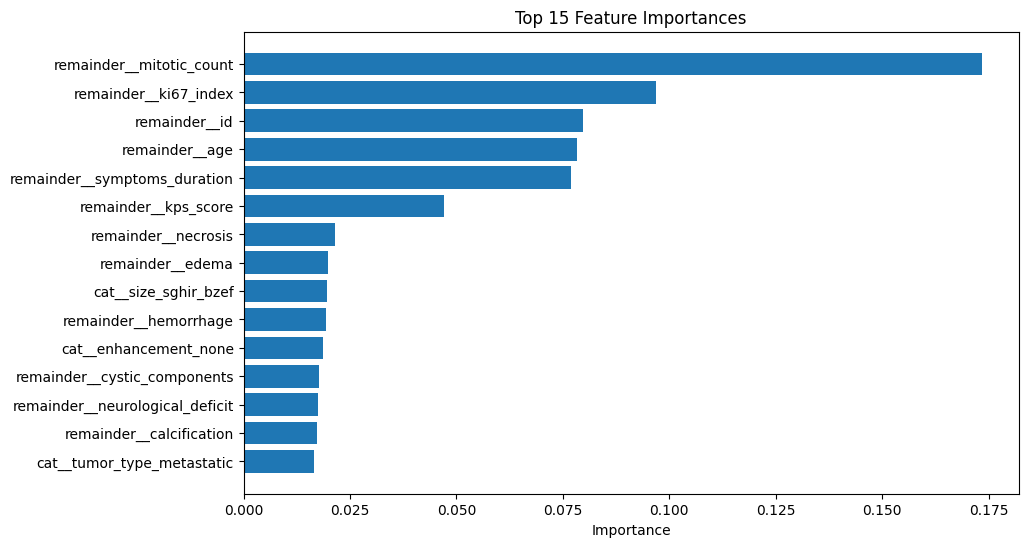

In [102]:
X = df.drop(columns=['id'])
feature_names = encoder.get_feature_names_out(df.drop(columns=['cancer_stage']).columns)

importances = model.feature_importances_

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances.head(10))

df.drop(columns=['cancer_stage']).columns

plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'][:15], feat_importances['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.show()


In [103]:
X_test = test_df.copy()
X_test_encoded = encoder.transform(X_test)

y_pred = model.predict(X_test_encoded)

y_pred_labels = label_encoder.inverse_transform(y_pred)

results = pd.DataFrame({
    'Predicted_Cancer_Stage': y_pred_labels
})

print(results.head())


  Predicted_Cancer_Stage
0                    III
1                     IV
2                     IV
3                     IV
4                     IV


In [104]:
ids = test_df['id']

submission = pd.DataFrame({
    'id': ids,
    'cancer_stage': y_pred_labels
})

In [105]:
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully!")

✅ Submission file created successfully!


In [106]:
print(submission.head())

     id cancer_stage
0  7000          III
1  7001           IV
2  7002           IV
3  7003           IV
4  7004           IV
